In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLV', 'XLY', 'XLU']
prices = yf.download(tickers, start = '2015-07-22', end = '2020-07-22')['Close']

prices.dropna(inplace=True)

prices.head()

C:\Users\anair26\AppData\Local\Temp\ipykernel_29816\888210396.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start = '2015-07-22', end = '2020-07-22')['Close']
[*********************100%***********************]  9 of 9 completed


Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2015-07-22,38.172897,47.283379,17.174095,45.129162,37.879162,38.438187,31.041740,65.296394,70.931496
2015-07-23,37.617874,47.243362,17.026382,44.712063,37.799290,38.292561,30.578968,65.059113,70.511185
2015-07-24,36.793549,46.336781,16.865250,44.128143,37.595150,38.077950,30.607887,63.431988,70.511185
2015-07-27,36.385456,45.670158,16.744400,43.911251,37.257893,38.054947,30.998343,63.372704,69.983597
2015-07-28,37.144489,46.976730,16.811537,44.762131,37.595150,38.484173,31.142977,64.516777,70.529121


In [16]:
normalized_prices = prices / prices.iloc[0] 

etfs = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLV', 'XLY', 'XLU']


pair_list = []
for i in range(len(etfs)):
    for j in range(i + 1, len(etfs)):  # avoid duplicates and self-pairs
        pair_list.append((etfs[i], etfs[j]))

pair_distances = []
for etf1, etf2 in pair_list:
    distance = np.sqrt(np.sum((normalized_prices[etf1] - normalized_prices[etf2]) ** 2))
    pair_distances.append({'Pair': f'{etf1}-{etf2}', 'Distance': distance})

distance_df = pd.DataFrame(pair_distances).sort_values(by='Distance')

distance_df = distance_df[:11]

distance_df


,Pair,Distance
1,XLB-XLF,3.124329
15,XLF-XLI,3.428271
30,XLP-XLV,3.443431
4,XLB-XLP,3.813788
24,XLI-XLY,4.027905
35,XLY-XLU,4.454753
5,XLB-XLV,4.500144
25,XLI-XLU,4.608532
2,XLB-XLI,5.064265
19,XLF-XLY,5.129896


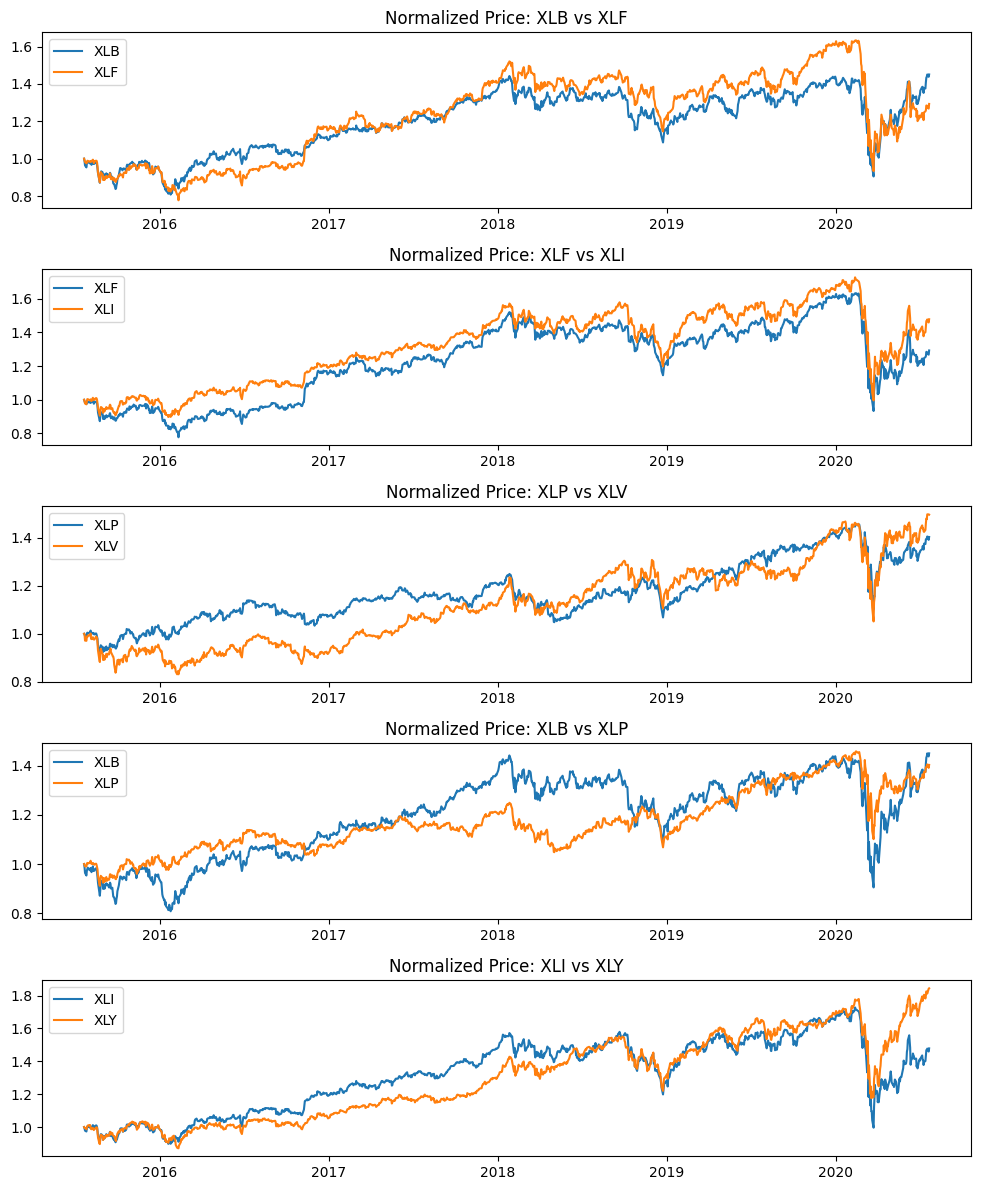

In [15]:
top_5_pairs = distance_df.head(5)['Pair'].tolist()
fig, axs = plt.subplots(len(top_5_pairs), 1, figsize=(10, 12))
for i, pair in enumerate(top_5_pairs):
    etf1, etf2 = pair.split('-')
    axs[i].plot(normalized_prices[etf1], label=etf1)
    axs[i].plot(normalized_prices[etf2], label=etf2)
    axs[i].set_title(f'Normalized Price: {etf1} vs {etf2}')
    axs[i].legend()
plt.tight_layout()
plt.show()